# Presetation of the Business Use case
 c'est c'est quoi notre cas pratique et de quoi il parle
 c'est quoi notre problème
 quelle est la solution
 pourquoi notre problème est important ?

 # Présentation du dataset
 EDA

 # Présentation de la baseline
 parler des modèle et dire pour quoi on les a utiliser
 parler de leurs résultats 

 # Meilleu modèle

# 1/ Import libraries

In [93]:
import pandas as pd
import pandas._typing
import numpy as np
import mlflow
import seaborn as sns
import xgboost as xgb 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor  
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from typing import cast
from sklearn.exceptions import NotFittedError
from sklearn.utils.validation import check_is_fitted
from IPython.display import display
from pathlib import Path
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
import pandas as pd
import optuna
warnings.simplefilter('ignore')


NameError: name 'warnings' is not defined

# 2/ Dataset Exploration

In [69]:
# Load the datasets
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [70]:
# Combine the test and train datasets for consistent preprocessing
combine = pd.concat([test, train], axis=0)

In [71]:
# View the first few rows of the combined dataset
combine.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,NaN
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,NaN
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,NaN
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,NaN
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,NaN


In [72]:
# Display information about the dataset
combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97743 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          97743 non-null  int64  
 1   person_age                  97743 non-null  int64  
 2   person_income               97743 non-null  int64  
 3   person_home_ownership       97743 non-null  object 
 4   person_emp_length           97743 non-null  float64
 5   loan_intent                 97743 non-null  object 
 6   loan_grade                  97743 non-null  object 
 7   loan_amnt                   97743 non-null  int64  
 8   loan_int_rate               97743 non-null  float64
 9   loan_percent_income         97743 non-null  float64
 10  cb_person_default_on_file   97743 non-null  object 
 11  cb_person_cred_hist_length  97743 non-null  int64  
 12  loan_status                 58645 non-null  float64
dtypes: float64(4), int64(5), object(4)
m

In [73]:
# Generate summary statistics for numerical columns
combine.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,97743.000000,97743.000000,9.774300e+04,97743.000000,97743.000000,97743.000000,97743.000000,97743.000000,58645.000000
mean,48871.000000,27.557227,6.405189e+04,4.695436,9231.120663,10.671211,0.159372,5.820417,0.142382
std,28216.118018,6.033008,3.794080e+04,3.923469,5568.786009,3.028910,0.091668,4.046423,0.349445
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,24435.500000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,48871.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,73306.500000,30.000000,7.574400e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,97742.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [74]:
combine.dropna()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0.0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0.0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0.0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0.0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0.0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1.0
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1.0
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0.0


In [75]:
df = combine.drop("loan_status", axis=1)
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3


# a) Data Cleaning

In [76]:
# Fill missing values in numerical columns with the column mean
filled = df.fillna(df.mean(numeric_only=True))
filled

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3


In [77]:
# Remove duplicates in the dataset
no_duplicates = filled.drop_duplicates()
no_duplicates

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3


# b) Export the combine dataset

In [78]:
# Exporter le DataFrame vers un fichier xlsx
no_duplicates.to_excel('All_data.xlsx', index=False)

# C) Plotting variables

In [79]:
dataset = pd.read_excel("All_data.xlsx")

Text(0.5, 1.0, 'Distribution of Loan Amount')

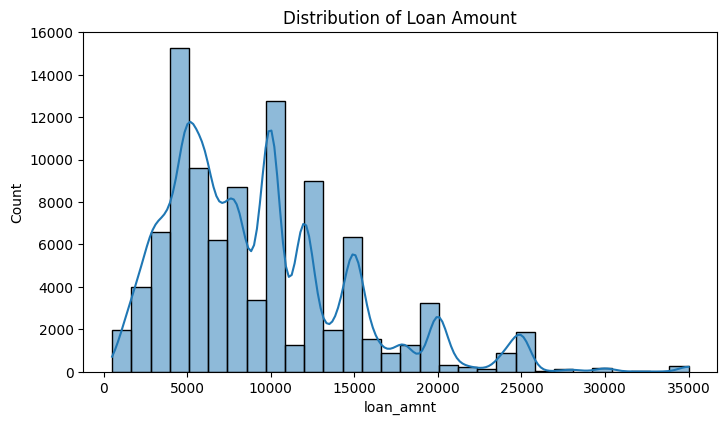

In [80]:
# Set up the plotting environment
plt.figure(figsize=(18, 15))

# Distribution of the target variable (loan_amnt)
plt.subplot(3, 2, 1)
sns.histplot(df['loan_amnt'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')

Text(0.5, 1.0, 'Distribution of Applicant Age')

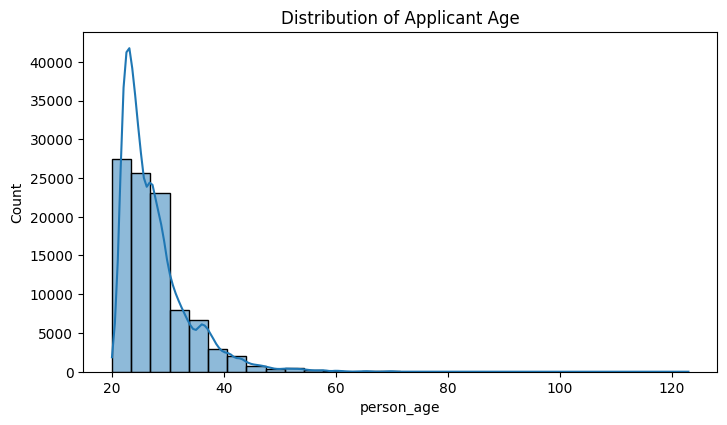

In [81]:
# Set up the plotting environment
plt.figure(figsize=(18, 15))

# Age distribution
plt.subplot(3, 2, 2)
sns.histplot(df['person_age'], kde=True, bins=30)
plt.title('Distribution of Applicant Age')

Text(0.5, 1.0, 'Distribution of Applicant Income')

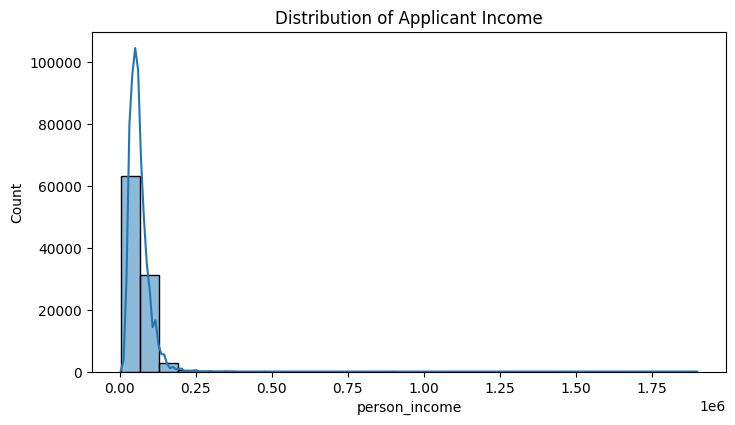

In [82]:
plt.figure(figsize=(18, 15))

# Income distribution
plt.subplot(3, 2, 3)
sns.histplot(df['person_income'], kde=True, bins=30)
plt.title('Distribution of Applicant Income')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'HOMEIMPROVEMENT'),
  Text(1, 0, 'PERSONAL'),
  Text(2, 0, 'VENTURE'),
  Text(3, 0, 'DEBTCONSOLIDATION'),
  Text(4, 0, 'EDUCATION'),
  Text(5, 0, 'MEDICAL')])

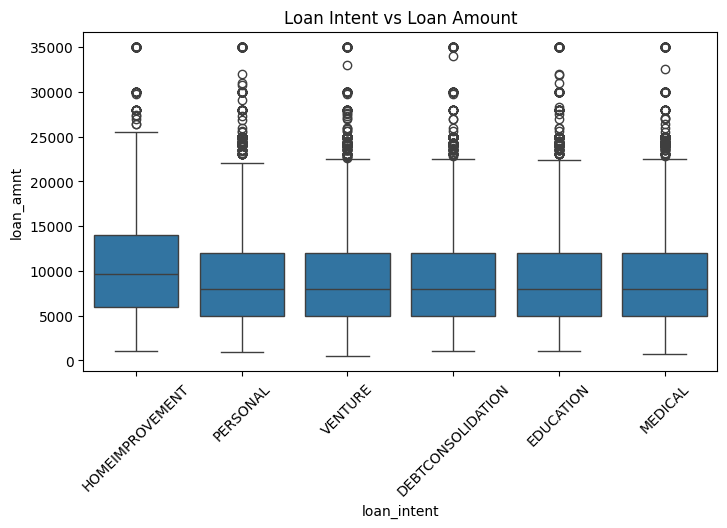

In [83]:
# Set up the plotting environment
plt.figure(figsize=(18, 15))

# Loan intent vs. Loan amount
plt.subplot(3, 2, 4)
sns.boxplot(x='loan_intent', y='loan_amnt', data=df)
plt.title('Loan Intent vs Loan Amount')
plt.xticks(rotation=45)

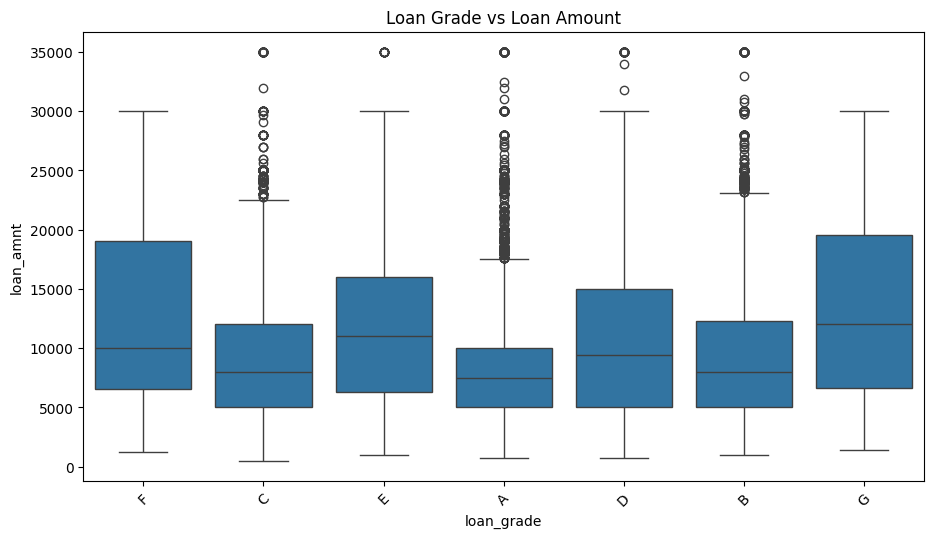

In [84]:
# Set up the plotting environment
plt.figure(figsize=(18, 15))

# Loan grade vs. Loan amount
plt.subplot(3, 2, 5)
sns.boxplot(x='loan_grade', y='loan_amnt', data=df)
plt.title('Loan Grade vs Loan Amount')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# d) Conversion of categorical variables and correlation matrix

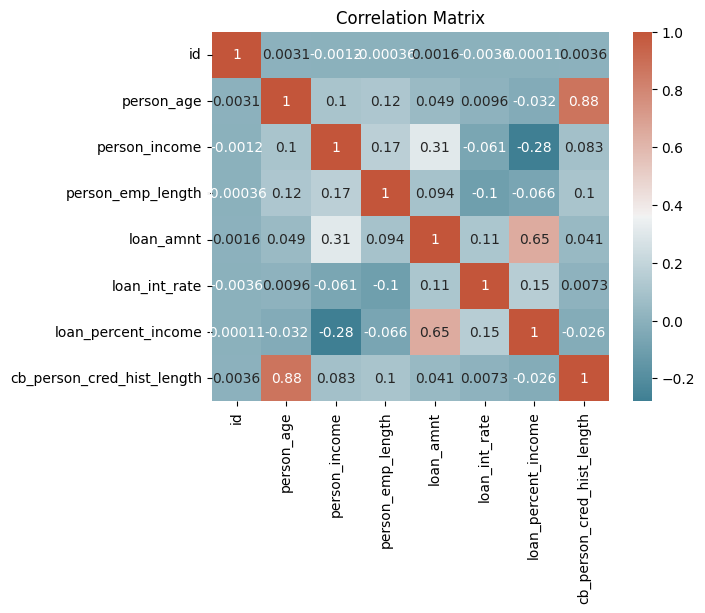

In [85]:
# Generate a correlation matrix for numerical features
Change = dataset.select_dtypes(include=['number'])
correlation = Change.corr()
sns.heatmap(correlation, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Correlation Matrix")
plt.show()

# 3/ Baseline Machine Learning (Logistic Regression)

# a) Outliers detection

In [86]:
# Fonction pour vérifier la présence d'outliers
def has_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound).any() or (column > upper_bound).any()

# Vérifier les outliers pour toutes les colonnes numériques
outlier_results = {column: has_outliers_iqr(dataset[column]) for column in dataset.select_dtypes(include='number').columns}

# Afficher le résultat
for column, has_outlier in outlier_results.items():
    print(f"Do we have outlier in column '{column}'? {'Yes' if has_outlier else 'No'}")

Do we have outlier in column 'id'? No
Do we have outlier in column 'person_age'? Yes
Do we have outlier in column 'person_income'? Yes
Do we have outlier in column 'person_emp_length'? Yes
Do we have outlier in column 'loan_amnt'? Yes
Do we have outlier in column 'loan_int_rate'? Yes
Do we have outlier in column 'loan_percent_income'? Yes
Do we have outlier in column 'cb_person_cred_hist_length'? Yes


# b) Outliers suppression


In [87]:
# List of columns to check for outliers
columns_to_check = [
    'person_age', 'person_income', 'loan_amnt', 
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
]

def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the data to remove outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data

# Remove outliers
no_outliers = remove_outliers_iqr(df, columns_to_check)

no_outliers

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
5,58650,23,66000,RENT,5.0,EDUCATION,D,22000,14.09,0.33,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
58639,58639,22,70000,RENT,6.0,DEBTCONSOLIDATION,A,10000,7.29,0.14,N,4
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3


# c) Train Test Split

In [88]:
no_outliers.shape

(82444, 12)

In [89]:
no_outliers.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'no_outliers' is your DataFrame without outliers
# Define the target variable
target_variable = 'loan_amnt'  # Target variable

# Define features and target variable
X = no_outliers.drop(columns=[target_variable])  # Features (all columns except the target)
y = no_outliers[target_variable]                  # Target variable

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,            # 20% for testing
    random_state=42           # For reproducibility
)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (65955, 11) (65955,)
Testing set shape: (16489, 11) (16489,)


# d) Baseline (regression)

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le préprocesseur
numeric_features = [...]  # Remplacez par vos colonnes numériques
categorical_features = [...]  # Remplacez par vos colonnes catégorielles

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Créer un modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Créer un pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : ", accuracy)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'no_outliers' is your DataFrame without outliers

# Select explanatory variables
X = no_outliers[['person_age', 'person_income', 'loan_int_rate']]  # Features
y = no_outliers['loan_amnt']  # Target variable

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Coefficients du modèle
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 17749665.711906243
R2 Score: 0.13182391448814035
               Coefficient
person_age        1.378560
person_income     0.068906
loan_int_rate   166.915180


# 4/ Iterations

In [25]:
# Define a function to train, predict, and evaluate models
def train_and_evaluate(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{model_name} - Mean Squared Error: {mse:.4f}')
    print(f'{model_name} - R² Score: {r2:.4f}')
    print('-------------------------------------------')

Linear regression

In [26]:
# Sélectionner les caractéristiques et la cible
features = no_outliers[['person_age', 'person_income', 'person_home_ownership',
                  'person_emp_length', 'loan_intent', 'loan_grade', 
                  'loan_int_rate', 'loan_percent_income', 
                  'cb_person_default_on_file', 'cb_person_cred_hist_length']]
target = no_outliers['loan_amnt']  # Cible : montant du prêt

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Définir le préprocesseur
numerical_features = ['person_age', 'person_income', 'person_emp_length', 
                      'loan_int_rate', 'loan_percent_income', 
                      'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 
                        'cb_person_default_on_file']  # Assurez-vous que c'est une caractéristique catégorielle

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the function to train, predict, and evaluate models
def train_and_evaluate(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{model_name} - Mean Squared Error: {mse:.4f}')
    print(f'{model_name} - R² Score: {r2:.4f}')
    print('-------------------------------------------')

# Exemple d'utilisation avec différents modèles
train_and_evaluate(LinearRegression(), 'Linear Regression')
train_and_evaluate(XGBRegressor(), 'XGBoost Regressor')

Linear Regression - Mean Squared Error: 2831514.1250
Linear Regression - R² Score: 0.8615
-------------------------------------------
XGBoost Regressor - Mean Squared Error: 190725.3307
XGBoost Regressor - R² Score: 0.9907
-------------------------------------------


In [27]:
# Ridge Regression
train_and_evaluate(Ridge(alpha=1.0), "Ridge Regression")

Ridge Regression - Mean Squared Error: 2831394.4857
Ridge Regression - R² Score: 0.8615
-------------------------------------------


In [28]:
# Random Forest Regressor
train_and_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest Regressor")

Random Forest Regressor - Mean Squared Error: 184671.0111
Random Forest Regressor - R² Score: 0.9910
-------------------------------------------


In [29]:
# HistGradientBoostingRegressor
train_and_evaluate(HistGradientBoostingRegressor(random_state=42), "HistGradient Boosting Regressor")

HistGradient Boosting Regressor - Mean Squared Error: 192761.8345
HistGradient Boosting Regressor - R² Score: 0.9906
-------------------------------------------


In [30]:
# XGBoost Regressor
train_and_evaluate(xgb.XGBRegressor(random_state=42), "XGBoost Regressor")

XGBoost Regressor - Mean Squared Error: 190725.3307
XGBoost Regressor - R² Score: 0.9907
-------------------------------------------


# a) K-Fold Validation

In [31]:
# Sélectionner les caractéristiques et la cible
features = no_outliers[['person_age', 'person_income', 'person_home_ownership',
                  'person_emp_length', 'loan_intent', 'loan_grade', 
                  'loan_int_rate', 'loan_percent_income', 
                  'cb_person_default_on_file', 'cb_person_cred_hist_length']]
target = no_outliers['loan_amnt']  # Cible : montant du prêt

# Définir le préprocesseur
numerical_features = ['person_age', 'person_income', 'person_emp_length', 
                      'loan_int_rate', 'loan_percent_income', 
                      'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 
                        'cb_person_default_on_file']  # Assurez-vous que c'est une caractéristique catégorielle

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the function to train, predict, and evaluate models
def train_and_evaluate(model, model_name, X, y):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # K-Fold Cross Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        pipeline.fit(X_train_kf, y_train_kf)
        
        # Make predictions
        y_pred = pipeline.predict(X_test_kf)
        
        # Evaluate the model
        mse = mean_squared_error(y_test_kf, y_pred)
        r2 = r2_score(y_test_kf, y_pred)
        
        mse_scores.append(mse)
        r2_scores.append(r2)

    print(f'{model_name} - Mean Squared Error: {np.mean(mse_scores):.4f}')
    print(f'{model_name} - R² Score: {np.mean(r2_scores):.4f}')
    print('-------------------------------------------')

# Exemple d'utilisation avec différents modèles
train_and_evaluate(LinearRegression(), 'Linear Regression', features, target)
train_and_evaluate(XGBRegressor(), 'XGBoost Regressor', features, target)

Linear Regression - Mean Squared Error: 2783590.0045
Linear Regression - R² Score: 0.8623
-------------------------------------------
XGBoost Regressor - Mean Squared Error: 162423.6710
XGBoost Regressor - R² Score: 0.9920
-------------------------------------------


In [32]:
no_outliers.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

Experiment Tracking

# Optuna

In [33]:

# Créer un préprocesseur
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Standardisation des caractéristiques numériques
        ('cat', OneHotEncoder(), categorical_features)  # Encodage des caractéristiques catégorielles
    ])


In [35]:
def objective(trial):
    try:
        C = trial.suggest_loguniform('C', 1e-5, 1e5)
        solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
        
        model = LogisticRegression(C=C, solver=solver, max_iter=1000)
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy
    except Exception as e:
        print(f"Error during training: {e}")
        return 0.0  # Ou une autre valeur par défaut

In [67]:
# Fonction d'optimisation des hyperparamètres
def objective(trial):
    try:
    # Choisir les hyperparamètres à optimiser
        C = trial.suggest_loguniform('C', 1e-5, 1e5)
        solver = trial.suggest_categorical('solver', ['saga'])
    
    # Créer le modèle avec les hyperparamètres
        model = LogisticRegression(C=C, solver=solver, max_iter=1000)

    # Créer un pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

    # Entraîner le modèle
        pipeline.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
        y_pred = pipeline.predict(X_test)

    # Calculer la précision
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy
    
    except Exception as e:
        print(f"Error during training: {e}")
        return 0.0  # Ou une autre valeur par défaut

# Créer une étude Optuna
study = optuna.create_study(direction='maximize')  # Maximiser la précision
study.optimize(objective, n_trials=24)  # Nombre d'essais

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", study.best_params)
print("Meilleure précision : ", study.best_value)

[I 2024-10-23 13:26:23,778] A new study created in memory with name: no-name-7a080d76-072d-49a3-91cf-e7db6b0e9ca0
C:\Users\lucil\AppData\Local\Temp\ipykernel_20128\393747879.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
[I 2024-10-23 13:26:23,778] Trial 0 finished with value: 0.0 and parameters: {'C': 26395.60427841684, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:26:23,786] Trial 1 finished with value: 0.0 and parameters: {'C': 390.6724434857694, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:26:23,788] Trial 2 finished with value: 0.0 and parameters: {'C': 100.71928272872633, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:26:23,790] Trial 3 finished with value: 0.0 and parameters: {'C': 171.46456560127208, 's

Error during training: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed
Error during training: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed
Error during training: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed
Error during training: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed
Error during training: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed
Error during training: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed
Error during training: No valid specification of the columns. Only a scalar, list or slice of all in

In [36]:
# Fonction d'optimisation des hyperparamètres
def objective(trial):
    try:
    # Choisir les hyperparamètres à optimiser
        C = trial.suggest_loguniform('C', 1e-5, 1e5)
        solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    
    # Créer le modèle avec les hyperparamètres
        model = LogisticRegression(C=C, solver=solver, max_iter=1000)

    # Créer un pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

    # Entraîner le modèle
        pipeline.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
        y_pred = pipeline.predict(X_test)

    # Calculer la précision
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy
    
    except Exception as e:
        print(f"Error during training: {e}")
        return 0.0  # Ou une autre valeur par défaut

# Créer une étude Optuna
study = optuna.create_study(direction='maximize')  # Maximiser la précision
study.optimize(objective, n_trials=100)  # Nombre d'essais

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", study.best_params)
print("Meilleure précision : ", study.best_value)

[I 2024-10-23 13:16:26,161] A new study created in memory with name: no-name-e2e8d127-5682-4264-92b8-623d2045a726
C:\Users\lucil\AppData\Local\Temp\ipykernel_20128\231981372.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
[I 2024-10-23 13:16:26,163] Trial 0 finished with value: 0.0 and parameters: {'C': 1268.6506478735055, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,163] Trial 1 finished with value: 0.0 and parameters: {'C': 4.1408885408571505, 'solver': 'liblinear'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,170] Trial 2 finished with value: 0.0 and parameters: {'C': 0.0018224443294725516, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,171] Trial 3 finished with value: 0.0 and parameters: {'C': 2518.8149120

Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error 

[I 2024-10-23 13:16:26,358] Trial 25 finished with value: 0.0 and parameters: {'C': 0.022868935671434866, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,374] Trial 26 finished with value: 0.0 and parameters: {'C': 0.00021571524074576377, 'solver': 'liblinear'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,395] Trial 27 finished with value: 0.0 and parameters: {'C': 12.156174238701942, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,406] Trial 28 finished with value: 0.0 and parameters: {'C': 0.0042040868603448345, 'solver': 'liblinear'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,411] Trial 29 finished with value: 0.0 and parameters: {'C': 1611.1566212406915, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,421] Trial 30 finished with value: 0.0 and parameters: {'C': 1.0532060834147687, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,427] Trial 31 finished

Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error 

[I 2024-10-23 13:16:26,544] Trial 47 finished with value: 0.0 and parameters: {'C': 11197.445054344293, 'solver': 'liblinear'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,555] Trial 48 finished with value: 0.0 and parameters: {'C': 885.7680235448296, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,561] Trial 49 finished with value: 0.0 and parameters: {'C': 2.276598798512598, 'solver': 'liblinear'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,570] Trial 50 finished with value: 0.0 and parameters: {'C': 40.438984060883584, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,578] Trial 51 finished with value: 0.0 and parameters: {'C': 0.0016005455162195219, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,586] Trial 52 finished with value: 0.0 and parameters: {'C': 1.9654201826208824e-05, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,593] Trial 53 finished wit

Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error 

[I 2024-10-23 13:16:26,729] Trial 68 finished with value: 0.0 and parameters: {'C': 24.798977718724295, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,741] Trial 69 finished with value: 0.0 and parameters: {'C': 0.598916379493207, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,746] Trial 70 finished with value: 0.0 and parameters: {'C': 3992.7305692785185, 'solver': 'liblinear'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,760] Trial 71 finished with value: 0.0 and parameters: {'C': 7.2400815485971695, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,772] Trial 72 finished with value: 0.0 and parameters: {'C': 1.0262545644489705, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,779] Trial 73 finished with value: 0.0 and parameters: {'C': 142.68213974554192, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,828] Trial 74 finished with value: 0.

Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe


[I 2024-10-23 13:16:26,927] Trial 79 finished with value: 0.0 and parameters: {'C': 0.002186555608681171, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,927] Trial 80 finished with value: 0.0 and parameters: {'C': 0.07659652207707396, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,944] Trial 81 finished with value: 0.0 and parameters: {'C': 0.000605048656742113, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,969] Trial 82 finished with value: 0.0 and parameters: {'C': 0.0002662470798354581, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,978] Trial 83 finished with value: 0.0 and parameters: {'C': 4.074442436948829e-05, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,978] Trial 84 finished with value: 0.0 and parameters: {'C': 0.0013512148833196359, 'solver': 'saga'}. Best is trial 0 with value: 0.0.
[I 2024-10-23 13:16:26,994] Trial 85 finished with

Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error during training: A given column is not a column of the dataframe
Error 

[I 2024-10-23 13:16:27,127] Trial 99 finished with value: 0.0 and parameters: {'C': 0.6307154836572345, 'solver': 'saga'}. Best is trial 0 with value: 0.0.


Error during training: A given column is not a column of the dataframe
Meilleurs hyperparamètres :  {'C': 1268.6506478735055, 'solver': 'saga'}
Meilleure précision :  0.0
